In [31]:
import xarray as xr
import xgcm as xgcm
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature as cfeature

import sys
sys.path.append('/g/data/hh5/tmp/WACI-Hackathon-2023/share/fm6730/')
import cloud_lib

fcloud = '/g/data/hh5/tmp/WACI-Hackathon-2023/AUS2200/raw/day2/history/atm/netCDF/umnsa_cldrad_20220223T0000_1h.nc'
ftemp  = '/g/data/hh5/tmp/WACI-Hackathon-2023/AUS2200/raw/day2/history/atm/netCDF/umnsa_mdl_20220223T0000_1h.nc'

ds_in = xr.open_dataset(fcloud)
ds_in

qis = ds_in["fld_s00i012"] #QICE & QSNOW
qg = ds_in["fld_s00i273"]  #QGRAUPEL
qc = ds_in["fld_s00i254"]  #QCLOUD
qr = ds_in["fld_s00i272"]  #QRAIN

qr.values

ds_t  = xr.open_dataset(ftemp)
t     = ds_t["fld_s16i004"].rename({'lon_0':'lon'})



In [35]:
help(cloud_lib.ctt_calc_icesnow)
print(cloud_lib.ctt_calc_icesnow.__doc__)

Help on function ctt_calc_icesnow in module cloud_lib:

ctt_calc_icesnow(qis, qg, qc, qr, t, latname='lat', lonname='lon', vertname='model_theta_level_number', thres=1e-05)

None


In [34]:
ctt   = cloud_lib.ctt_calc_icesnow(qis,qg,qc,qr,t)

Exception ignored in: <function CachingFileManager.__del__ at 0x1472ef032ee0>
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.10/lib/python3.9/site-packages/xarray/backends/file_manager.py", line 235, in __del__
    def __del__(self) -> None:
KeyboardInterrupt: 

KeyboardInterrupt



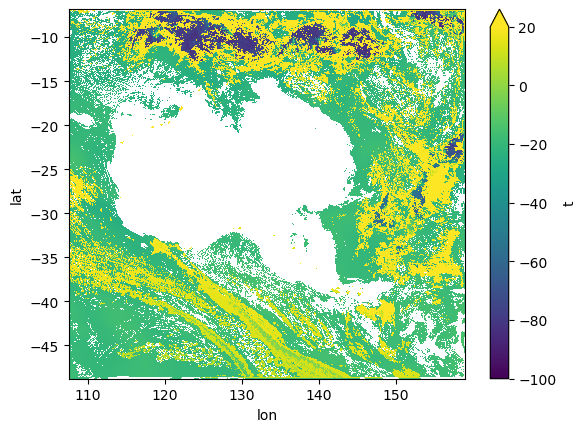

In [294]:
ctt.plot(vmax=20,vmin=-100)


No operator given!

--------------------------------------------------------------------------------
  Usage : cdo  [Options]  Operator1  [-Operator2  [-OperatorN]]
--------------------------------------------------------------------------------

=== Options ====================================================================
    -a, --absolute_taxis                      Generate an absolute time axis.
        --argument_groups 
        --attribs  <arbitrary|filesOnly|onlyFirst|noOutput|obase> 
                                              Lists all operators with choosen features or the attributes of given operator(s)
                                              operator name or a combination of [arbitrary,filesOnly,onlyFirst,noOutput,obase].
    -S, --cdo_diagnostic                      Create an extra output stream for the module TIMSTAT. This stream
                                              contains the number of non missing values for each output period.
        --cellsearch